In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load data
file_path = "/Users/magdalenarepp/Downloads/emotion_sentimen_dataset.csv"
df = pd.read_csv(file_path)

# first look at data frame
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/magdalenarepp/Downloads/emotion_sentimen_dataset.csv'

In [3]:
# remove unneccessary columns
df = df.drop(columns=["Unnamed: 0"])

NameError: name 'df' is not defined

In [12]:
# Absolute frequency of emotions
emotion_counts = df['Emotion'].value_counts()

# Percentage distribution
emotion_percent = df['Emotion'].value_counts(normalize=True) * 100

# Table with absolute and percentage distribution
emotion_distribution = pd.DataFrame({
    "Anzahl": emotion_counts,
    "Prozent": emotion_percent.round(2)
})

emotion_distribution

,Anzahl,Prozent
Emotion,,
neutral,674538,80.34
love,39553,4.71
happiness,27175,3.24
sadness,17481,2.08
relief,16729,1.99
hate,15267,1.82
anger,12336,1.47
fun,10075,1.20
enthusiasm,9304,1.11


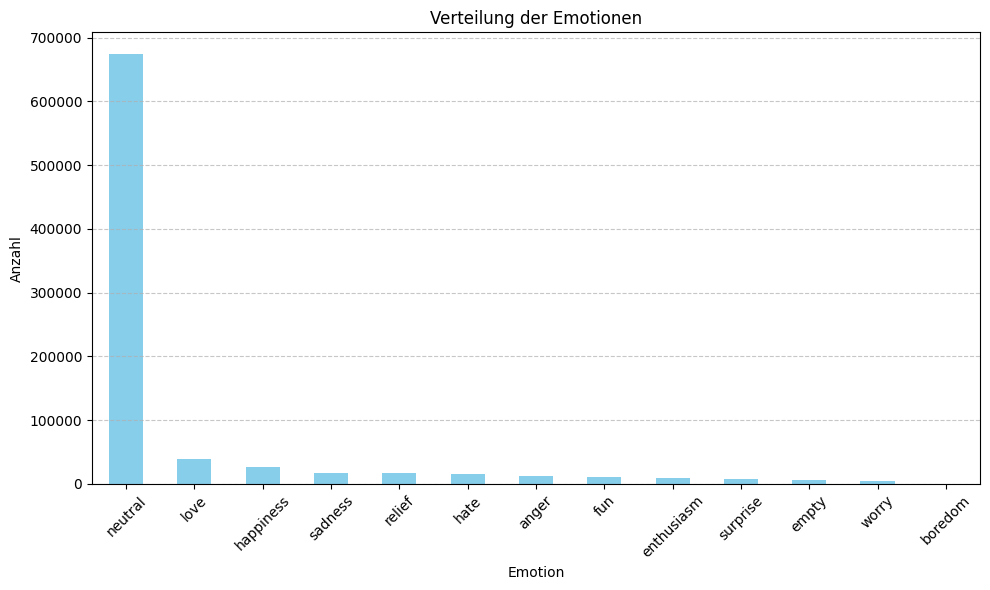

In [ ]:
# plot histogramm
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title("Verteilung der Emotionen")
plt.xlabel("Emotion")
plt.ylabel("Anzahl")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [20]:
# show 10 examples for "love"
df[df['Emotion'] == 'empty']['text'].head(10)


42      i feel and some is just a hateful of hollow ye...
241     i guess avoiding the boundaries conversation w...
866     i want to find my essence and my substance and...
1452    i do how empty disappointed angry sad chaotic ...
1598    i got inside it was so warm compared to the ou...
1794                    i want to avoid feeling terrified
2075    i feel hateful to have given up my friendship ...
2085    i asked that no one gift me but if i go to my ...
2146      i can feel them cool but seldom empty pale with
2220    i am normally better at avoiding the expensive...
Name: text, dtype: object

In [12]:
pwd

'/Users/magdalenarepp/code/magadare/emotionplot2/notebooks'

In [5]:
with open("/Users/magdalenarepp/code/magadare/emotionplot2/raw_data/SherlockHolmes.txt") as file:
    data = file.read()

#print(data)


In [2]:
!pip install nltk

In [49]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

def chunk_by_sentences(text, sentences_per_chunk= 10):
    sentences = sent_tokenize(data)
    chunks = []

    for i in range(0, len(sentences), sentences_per_chunk):
        chunk = sentences[i:i+sentences_per_chunk]
        chunks.append(" ".join(chunk))

    return chunks

chunks = chunk_by_sentences(data, sentences_per_chunk=10)

# Create DataFrame with each chunk as a row
df = pd.DataFrame({'chunk': chunks})

#print(df.head())

df

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/magdalenarepp/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,chunk
0,\nTo Sherlock Holmes she is always _the_ woman...
1,"And\\nyet there was but one woman to him, and ..."
2,He had risen out of his drug-created\\ndreams ...
3,"You would certainly have\\nbeen burned, had yo..."
4,"For example, you have frequently seen the step..."
...,...
373,It was empty. There was no furniture\\nsave a ...
374,"Spies and\\nthieves! I have caught you, have I..."
375,"Running up, I blew its brains out, and it fell..."
376,"As well as I could learn, Miss Alice had right..."


In [ ]:
# clean text


punctuation = ['!','"','#','$','%','&','(',')','*','+','-','/',':',';','<', '=','>','@',"'\'",'"]"','^','_']     # research how to remove back slash

def preprocessing(text):
    # Lowercase
    text = text.lower()

    # Remove numbers
    text = ''.join([char for char in text if not char.isdigit()])

    # Remove punctuation
    for punct in punctuation:
        text = text.replace(punct, ' ')

    # Tokenize (split into words)
    tokens = text.split()

    return ' '.join(tokens)

df["cleaned_chunk"] = df["chunk"].apply(preprocessing)

df

,chunk,cleaned_chunk
0,\nTo Sherlock Holmes she is always _the_ woman...,to sherlock holmes she is always the woman. i ...
1,"And\\nyet there was but one woman to him, and ...","and\ yet there was but one woman to him, and t..."
2,He had risen out of his drug-created\\ndreams ...,he had risen out of his drug created\ dreams a...
3,"You would certainly have\\nbeen burned, had yo...","you would certainly have\ been burned, had you..."
4,"For example, you have frequently seen the step...","for example, you have frequently seen the step..."
...,...,...
373,It was empty. There was no furniture\\nsave a ...,it was empty. there was no furniture\ save a l...
374,"Spies and\\nthieves! I have caught you, have I...","spies and\ thieves i have caught you, have i? ..."
375,"Running up, I blew its brains out, and it fell...","running up, i blew its brains out, and it fell..."
376,"As well as I could learn, Miss Alice had right...","as well as i could learn, miss alice had right..."


In [54]:

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")
model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")

# Get ID-to-label mapping from model config
id2label = model.config.id2label


def predict_emotion(data):
    # Tokenize input sentence
    inputs = tokenizer(data, return_tensors="pt", truncation=True, padding=True, max_length=128)
    # Get model predictions
    with torch.no_grad():
        outputs = model(**inputs)
    # Convert logits to probabilities
    probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
    # Get the predicted emotion label
    predicted_label = torch.argmax(probabilities).item()
    return predicted_label



# Load your DataFrame (assuming it's called df)
#df["Predicted_Emotion"] = df["cleaned_chunk"].apply(predict_emotion)

# Apply model to DataFrame (assuming df["chunk"] exists)
df["Predicted_Emotion_ID"] = df["cleaned_chunk"].apply(predict_emotion)
df["Predicted_Emotion"] = df["Predicted_Emotion_ID"].map(id2label)

# Print results
print(df.head())

df

                                               chunk  \
0  \nTo Sherlock Holmes she is always _the_ woman...   
1  And\\nyet there was but one woman to him, and ...   
2  He had risen out of his drug-created\\ndreams ...   
3  You would certainly have\\nbeen burned, had yo...   
4  For example, you have frequently seen the step...   

                                       cleaned_chunk Predicted_Emotion  \
0  to sherlock holmes she is always the woman. i ...           neutral   
1  and\ yet there was but one woman to him, and t...           neutral   
2  he had risen out of his drug created\ dreams a...           neutral   
3  you would certainly have\ been burned, had you...           neutral   
4  for example, you have frequently seen the step...           neutral   

   Predicted_Emotion_ID  
0                    27  
1                    27  
2                    27  
3                    27  
4                    27  


,chunk,cleaned_chunk,Predicted_Emotion,Predicted_Emotion_ID
0,\nTo Sherlock Holmes she is always _the_ woman...,to sherlock holmes she is always the woman. i ...,neutral,27
1,"And\\nyet there was but one woman to him, and ...","and\ yet there was but one woman to him, and t...",neutral,27
2,He had risen out of his drug-created\\ndreams ...,he had risen out of his drug created\ dreams a...,neutral,27
3,"You would certainly have\\nbeen burned, had yo...","you would certainly have\ been burned, had you...",neutral,27
4,"For example, you have frequently seen the step...","for example, you have frequently seen the step...",neutral,27
...,...,...,...,...
373,It was empty. There was no furniture\\nsave a ...,it was empty. there was no furniture\ save a l...,neutral,27
374,"Spies and\\nthieves! I have caught you, have I...","spies and\ thieves i have caught you, have i? ...",neutral,27
375,"Running up, I blew its brains out, and it fell...","running up, i blew its brains out, and it fell...",neutral,27
376,"As well as I could learn, Miss Alice had right...","as well as i could learn, miss alice had right...",neutral,27


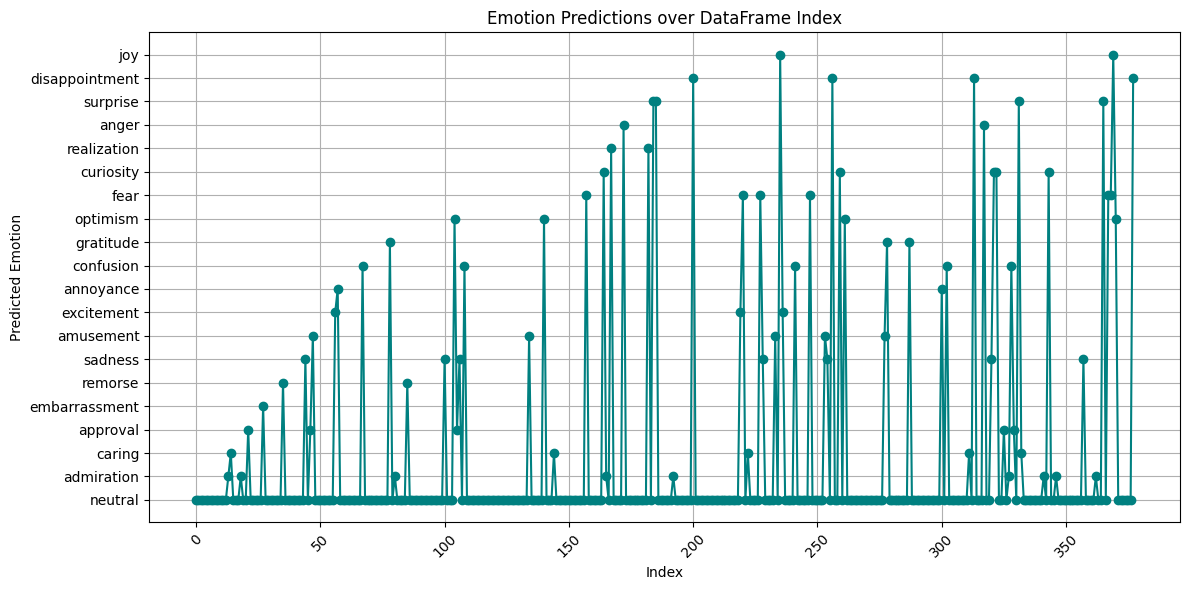

In [55]:
import matplotlib.pyplot as plt
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# # Load tokenizer and model
# tokenizer = AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")
# model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")

# # Get ID-to-label mapping from model config
# id2label = model.config.id2label

# # Emotion prediction function
# def predict_emotion(data):
#     inputs = tokenizer(data, return_tensors="pt", truncation=True, padding=True, max_length=128)
#     with torch.no_grad():
#         outputs = model(**inputs)
#     probabilities = torch.nn.functional.softmax(outputs.logits, dim=-1)
#     predicted_label = torch.argmax(probabilities).item()
#     return predicted_label

# # Apply model to DataFrame (assuming df["chunk"] exists)
# df["Predicted_Emotion_ID"] = df["chunk"].apply(predict_emotion)
# df["Predicted_Emotion"] = df["Predicted_Emotion_ID"].map(id2label)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df.index, df["Predicted_Emotion"], marker='o', linestyle='-', color='teal')
plt.xlabel("Index")
plt.ylabel("Predicted Emotion")
plt.title("Emotion Predictions over DataFrame Index")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [56]:
# import torch
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt
# from transformers import AutoTokenizer, AutoModelForSequenceClassification

# # Load model and tokenizer
# tokenizer = AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")
# model = AutoModelForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")

# # Get label mapping
# id2label = model.config.id2label
# labels = [id2label[i] for i in range(len(id2label))]

# # Function to get emotion probabilities
# def get_emotion_probs(text):
#     inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=128)
#     with torch.no_grad():
#         outputs = model(**inputs)
#     probs = torch.nn.functional.softmax(outputs.logits, dim=-1).squeeze()
#     return probs.tolist()

# # Apply to all rows
# emotion_probs = df["chunk"].apply(get_emotion_probs)

# # Create a DataFrame with emotion probabilities
# emotion_df = pd.DataFrame(emotion_probs.tolist(), columns=labels)

# # Create the heatmap
# plt.figure(figsize=(14, 8))
# sns.heatmap(emotion_df, cmap="coolwarm", linewidths=0.5, xticklabels=True, yticklabels=True)
# plt.title("Emotion Heatmap Across Sentences")
# plt.xlabel("Emotion")
# plt.ylabel("Sentence Index")
# plt.tight_layout()
# plt.show()

In [20]:
df.iloc[101]

chunk                   I shall be happy to give you an opinion upon\\...
Predicted_Emotion                                                optimism
Predicted_Emotion_ID                                                   20
Name: 101, dtype: object

In [91]:
!pip3 install torch torchvision


In [ ]:
import string

punctuation = ['!','"','#','$','%','&','(',')','*','+','-','/',':',';','<', '=','>','@',"\\",'"]"','^','_']     # research how to remove back slash

def preprocessing(text):
    # Lowercase
    text = text.lower()

    # Remove numbers
    text = ''.join([char for char in text if not char.isdigit()])
x
    # Remove punctuation
    for punct in punctuation:
        text = text.replace(punct, ' ')

    # Tokenize (split into words)
    tokens = text.split()

    return ' '.join(tokens)

df["cleaned_chunk"] = df["chunk"].apply(preprocessing)

df

,chunk,Predicted_Emotion,Predicted_Emotion_ID,cleaned_chunk
0,\nTo Sherlock Holmes she is always _the_ woman...,neutral,27,to sherlock holmes she is always the woman. i ...
1,"And\\nyet there was but one woman to him, and ...",neutral,27,"and\ yet there was but one woman to him, and t..."
2,He had risen out of his drug-created\\ndreams ...,neutral,27,he had risen out of his drug created\ dreams a...
3,"You would certainly have\\nbeen burned, had yo...",neutral,27,"you would certainly have\ been burned, had you..."
4,"For example, you have frequently seen the step...",neutral,27,"for example, you have frequently seen the step..."
...,...,...,...,...
373,It was empty. There was no furniture\\nsave a ...,neutral,27,it was empty. there was no furniture\ save a l...
374,"Spies and\\nthieves! I have caught you, have I...",neutral,27,"spies and\ thieves i have caught you, have i? ..."
375,"Running up, I blew its brains out, and it fell...",neutral,27,"running up, i blew its brains out, and it fell..."
376,"As well as I could learn, Miss Alice had right...",neutral,27,"as well as i could learn, miss alice had right..."


In [34]:
dtype(punctuation)

NameError: name 'dtype' is not defined

In [ ]:
chunk.dtype

AttributeError: 'str' object has no attribute 'dtype'

In [82]:
!pip install transformers

In [ ]:
!pip install TensorFlow

  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.5-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached termcolor-3.1.0-py3-none-any.whl.metadata (6.4 kB)
  Using cached wrapt-1.17.2-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.4 kB)
  Using cached markdown-3.8-py3-none-any.whl.metadata (5.1 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 

In [78]:
!pip install torch torchvision torchaudio

  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.2-py3-none-any.whl.metadata (6.3 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 11.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.4 MB/s eta 0:00:00
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
Using cached networkx-3.4.2-py3-none-any.whl (1.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6/6 [torchaudio]6 [torchvision]


In [84]:
from transformers import pipeline


# Load the emotion classification pipeline
classifier = pipeline(
    task="text-classification",
    model="SamLowe/roberta-base-go_emotions",
    top_k=None  # Return all possible emotion labels
)
# Load the CSV file
#df = pd.read_csv("/home/dorothee/code/magadare/emotionplot2/raw_data/emotion_sentimen_dataset.csv")
#df = df.head(250)
# Classify each phrase
phrases = df["chunk"].tolist()
results = classifier(phrases)
# Filter emotions with score above threshold
def filter_emotions(scores, threshold=0.5):
    return {s["label"]: round(s["score"], 3) for s in scores if s["score"] > threshold}
df["emotions"] = [filter_emotions(r, threshold=0.5) for r in results]

RuntimeError: At least one of TensorFlow 2.0 or PyTorch should be installed. To install TensorFlow 2.0, read the instructions at https://www.tensorflow.org/install/ To install PyTorch, read the instructions at https://pytorch.org/.

In [75]:
!pip freeze | grep tensorflow

tensorflow==2.19.0
tensorflow-io-gcs-filesystem==0.37.1


Error fetching URL: ('Connection broken: IncompleteRead(388791 bytes read, 251199 more expected)', IncompleteRead(388791 bytes read, 251199 more expected))
Failed to retrieve text from the URL.
